In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
data=pd.read_excel('Superstore.xlsx',sheet_name='Orders')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
data=data.drop('Row ID',axis=1)

data=data[[ 
        'Order ID', 
        'Order Date', 
        'Ship Date', 
        'Ship Mode', 
    #'Customer ID',
    #'Customer Name', 
        'Segment', 
    #'Country', 
        'City', 
        'State', 
    #'Postal Code',
        'Region', 
    #'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]
data.head(3)                     # final dataframe, after columns were removed

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [6]:
# feature engineering, extracts specific date values from the `Order Date` column, creates new features from existing features
data['month']=data['Order Date'].dt.month 
data['year']=data['Order Date'].dt.year
data['year_month']=data['Order Date'].dt.to_period('M')
data['total_discount_in_dollars']=data['Sales'] * data['Discount'] # discount's equivalent to dollars
data['selling_price']=data['Sales'] / data['Quantity'] # calculates selling price for the each product
data['(net)_profit_before_discount']=data['Sales'] * data['Discount'] + data['Profit'] # net profit before deducting discount
data['order_fulfillment_time']=data['Ship Date'] - data['Order Date'] # interval between order placed and order shipped
data['net_profit_per_unit_sold']=data['Profit'] / data['Quantity'] # net profit generated per unit sold
data=data.rename(columns={'Profit':'net_profit'}) # renames Profit column with net_profit, a more specific name
data['profit_margin']=data['net_profit'] / data['Sales'] * 100 # for a 25% profit margin, the company makes .25 dollars per 1 dollar sale
data['discounted_sales']=data['Sales'] - (data['Discount']*data['Sales']) # extracts sales accounted for discount

In [7]:
print('Output dataframe:')
data.head(5)

Output dataframe:


,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,...,Discount,net_profit,month,year,year_month,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,...,0.0000,41.9136,11,2013,2013-11,0.0000,130.9800,41.9136,3 days,20.9568,16.0000,261.9600
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,...,0.0000,219.5820,11,2013,2013-11,0.0000,243.9800,219.5820,3 days,73.1940,30.0000,731.9400
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,...,0.0000,6.8714,6,2013,2013-06,0.0000,7.3100,6.8714,4 days,3.4357,47.0000,14.6200
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,...,0.4500,-383.0310,10,2012,2012-10,430.9099,191.5155,47.8789,7 days,-76.6062,-40.0000,526.6676
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,...,0.2000,2.5164,10,2012,2012-10,4.4736,11.1840,6.9900,7 days,1.2582,11.2500,17.8944


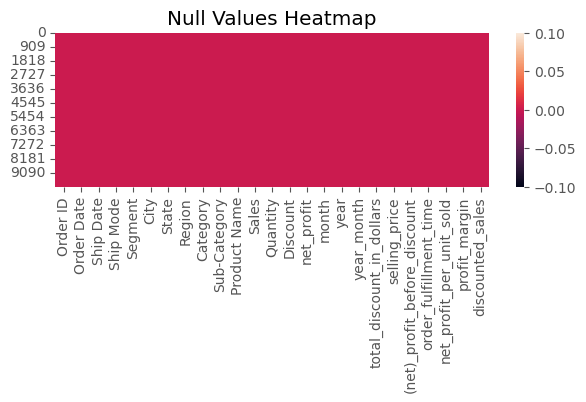

In [8]:
plt.figure(figsize=(7,2))

plt.title('Null Values Heatmap')
sns.heatmap(data.isnull())
plt.show()

In [9]:
print('The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.')
data.describe()

The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.


,Order Date,Ship Date,Sales,Quantity,Discount,net_profit,month,year,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
count,9994,9994,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994,9994.0000,9994.0000,9994.0000
mean,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,229.8580,3.7896,0.1562,28.6569,7.8146,2012.7229,32.2776,60.9196,60.9345,3 days 23:00:46.828096858,7.7994,12.0314,197.5804
min,2011-01-04 00:00:00,2011-01-08 00:00:00,0.4440,1.0000,0.0000,-6599.9780,1.0000,2011.0000,0.0000,0.3360,-3449.9885,0 days 00:00:00,-1319.9956,-275.0000,0.0888
25%,2012-05-23 00:00:00,2012-05-27 00:00:00,17.2800,2.0000,0.0000,1.7288,5.0000,2012.0000,0.0000,5.4700,4.7754,3 days 00:00:00,0.7228,7.5000,14.3360
50%,2013-06-27 00:00:00,2013-06-30 00:00:00,54.4900,3.0000,0.2000,8.6665,9.0000,2013.0000,1.0368,16.2700,14.6352,4 days 00:00:00,2.7670,27.0000,45.9232
75%,2014-05-15 00:00:00,2014-05-19 00:00:00,209.9400,5.0000,0.2000,29.3640,11.0000,2014.0000,14.8704,63.9400,50.3280,5 days 00:00:00,8.7032,36.2500,180.1765
max,2014-12-31 00:00:00,2015-01-06 00:00:00,22638.4800,14.0000,0.8000,8399.9760,12.0000,2014.0000,11319.2400,3773.0800,9508.1616,7 days 00:00:00,1679.9952,50.0000,17499.9500
std,NaN,NaN,623.2451,2.2251,0.2065,234.2601,3.2860,1.1240,164.0256,142.9274,248.7399,1 days 17:55:49.143486104,56.0750,46.6754,539.0453


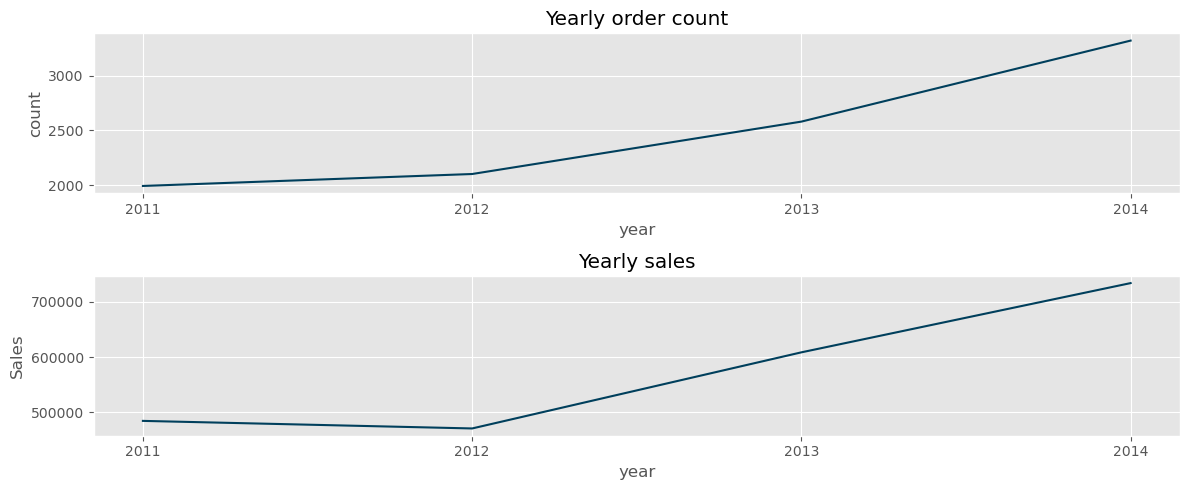

In [10]:

plt.figure(figsize=(12,5))

plt.subplot(211)
data.groupby(['year'])['Order Date'].count().plot(c='#003f5c')
plt.ylabel('count')
plt.xticks(data.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')

plt.subplot(212)
data.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(data.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')

plt.tight_layout()
plt.show()

In [11]:
print('Annual total sales: ')
data.groupby('year')['Sales'].sum()

Annual total sales: 


year
2011   484247.4981
2012   470532.5090
2013   608473.8300
2014   733947.0232
Name: Sales, dtype: float64

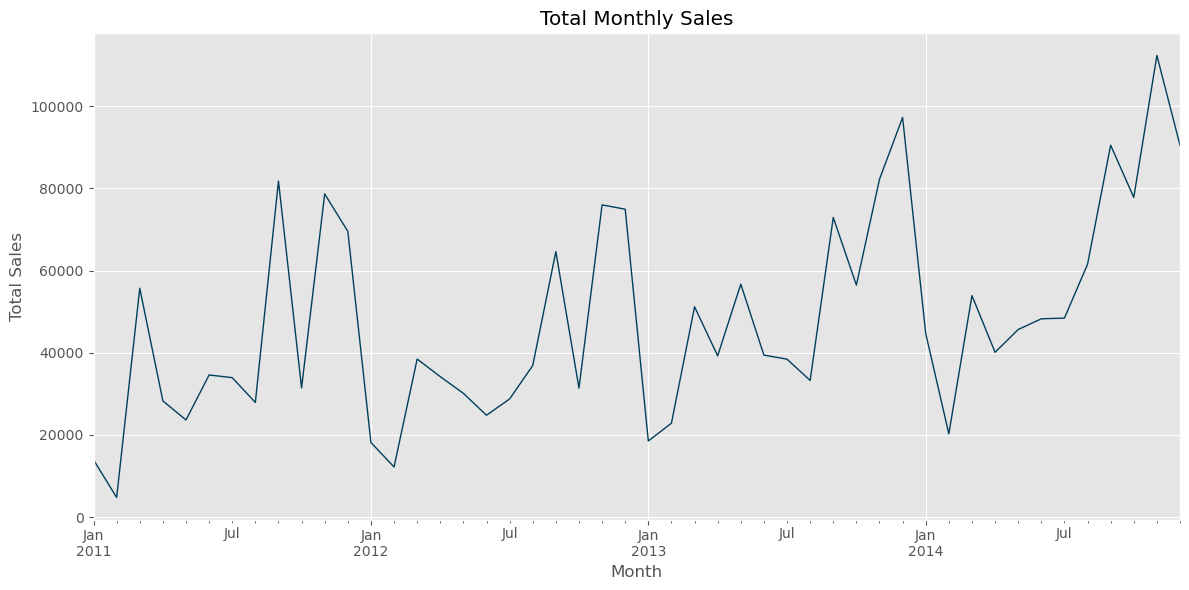

In [12]:
data.groupby('year_month')['Sales'].sum().plot(c='#003f5c',linewidth=1,figsize=(12,6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

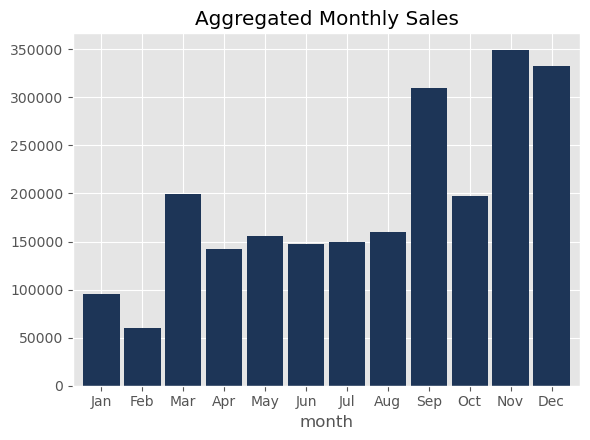

In [13]:

data.groupby('month')['Sales'].sum().plot(kind='bar',color='#1d3557',figsize=(6,4.5),width=.89)
plt.title('Aggregated Monthly Sales')
plt.xticks(ticks=np.arange(0,12,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)

plt.tight_layout()
plt.show()

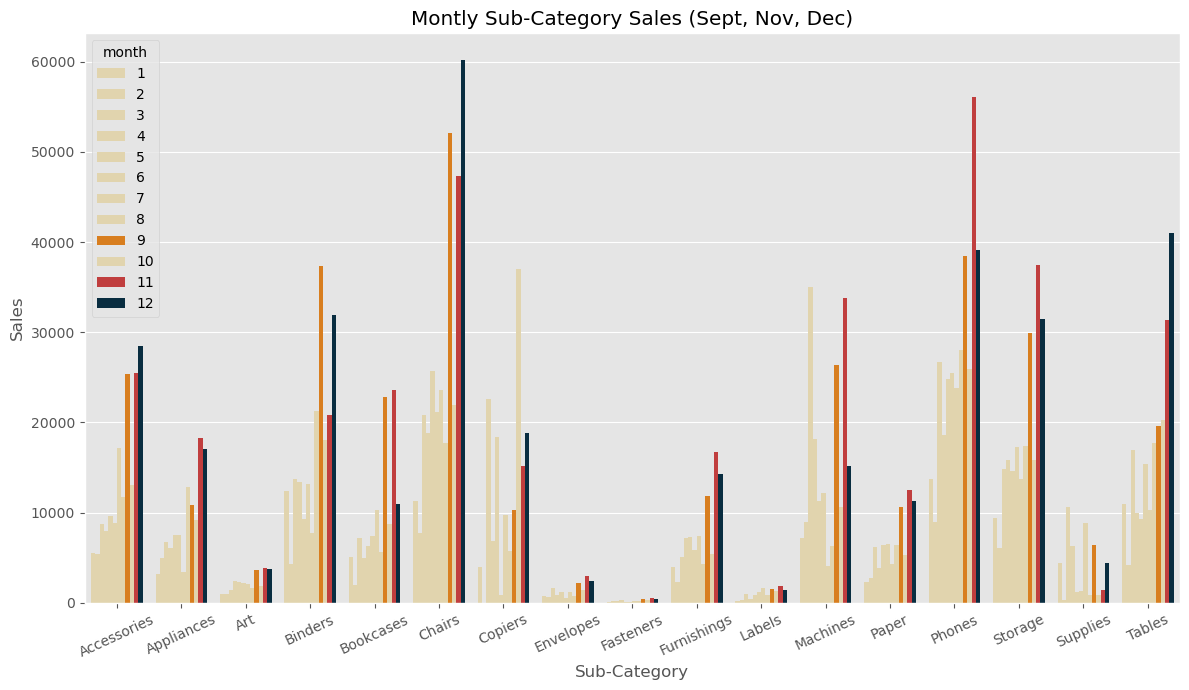

In [14]:
month_subcat=pd.DataFrame(data.groupby(['month','Sub-Category'])['Sales'].sum().reset_index())
month_subcat

plt.figure(figsize=(12,7))
sns.barplot(data=month_subcat,\
            x='Sub-Category',\
            y='Sales',\
            hue='month',\
            palette=['#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#e9d8a6',\
                     '#e9d8a6','#e9d8a6','#f77f00',\
                     '#e9d8a6','#d62828','#003049'])
plt.title('Montly Sub-Category Sales (Sept, Nov, Dec)')
plt.xticks(rotation=25)

plt.tight_layout()

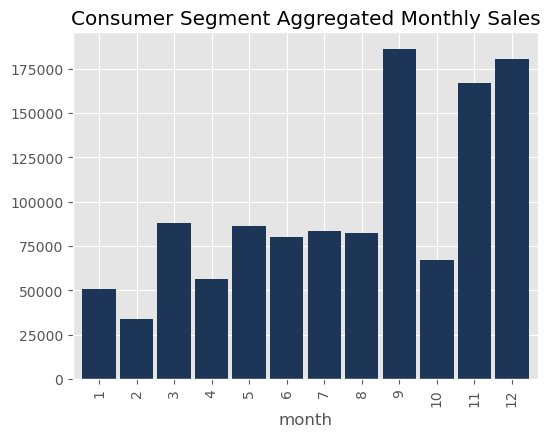

In [15]:
data.query('Segment == "Consumer"').groupby('month')['Sales'].sum().plot(kind='bar',\
                                                                         figsize=(6,4.5),\
                                                                         width=.89,\
                                                                         color='#1d3557')
plt.title('Consumer Segment Aggregated Monthly Sales')
plt.show()

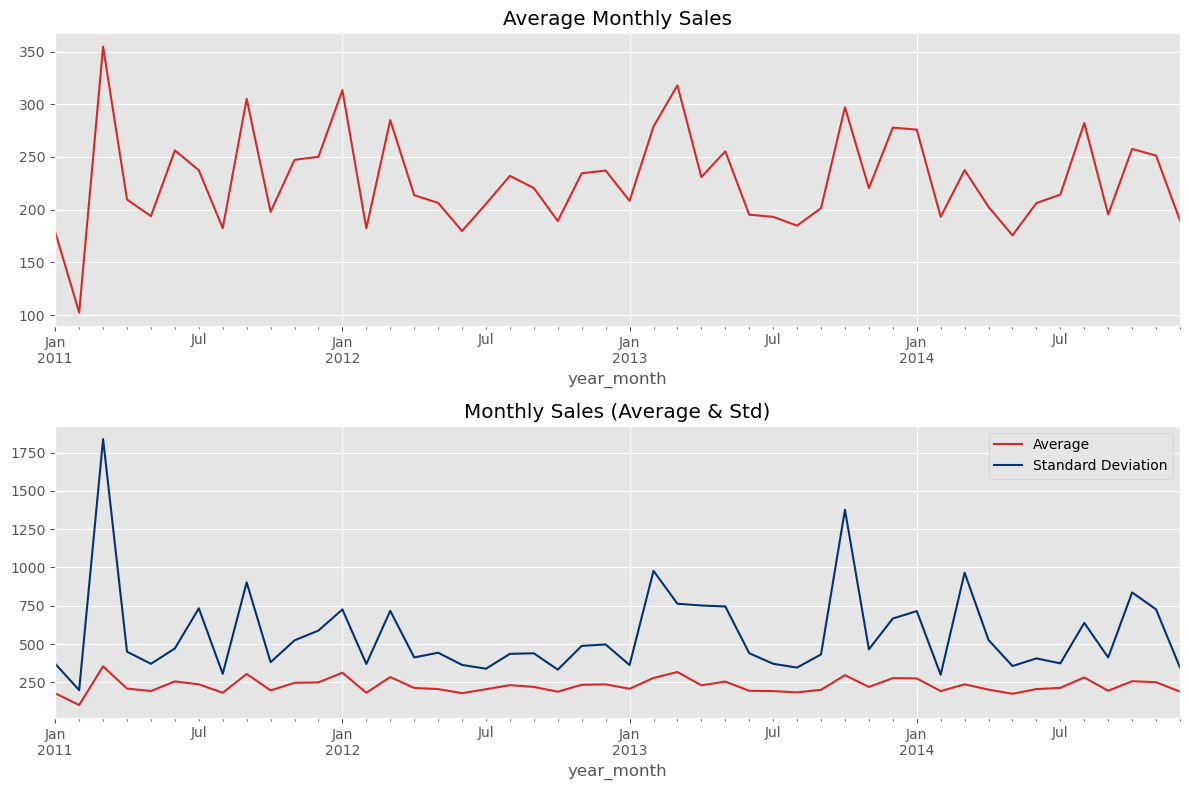

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(211)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
plt.title('Average Monthly Sales')

plt.subplot(212)
data.groupby('year_month')['Sales'].mean().plot(linewidth=1.5,color='#d62828')
data.groupby('year_month')['Sales'].describe()['std'].plot(linewidth=1.5,color='#033270')
plt.title('Monthly Sales (Average & Std)')
plt.legend(['Average','Standard Deviation'])

plt.tight_layout()
plt.show()

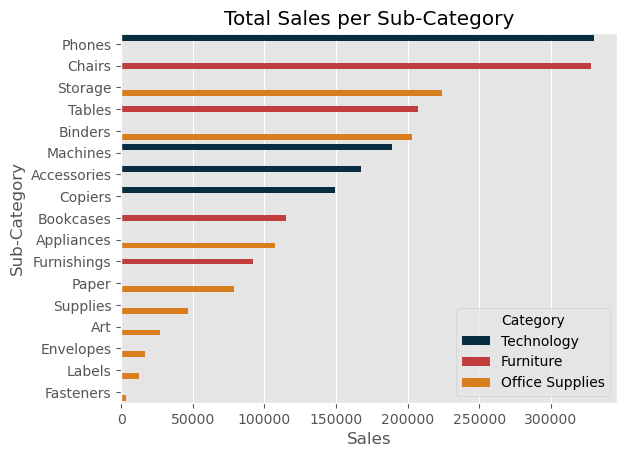

In [17]:
df_sales=pd.DataFrame(data.groupby(['Category','Sub-Category'])['Sales'].sum()).reset_index().sort_values('Sales',ascending=False)

sns.barplot(x='Sales',y='Sub-Category',data=df_sales,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('Total Sales per Sub-Category')

plt.show()

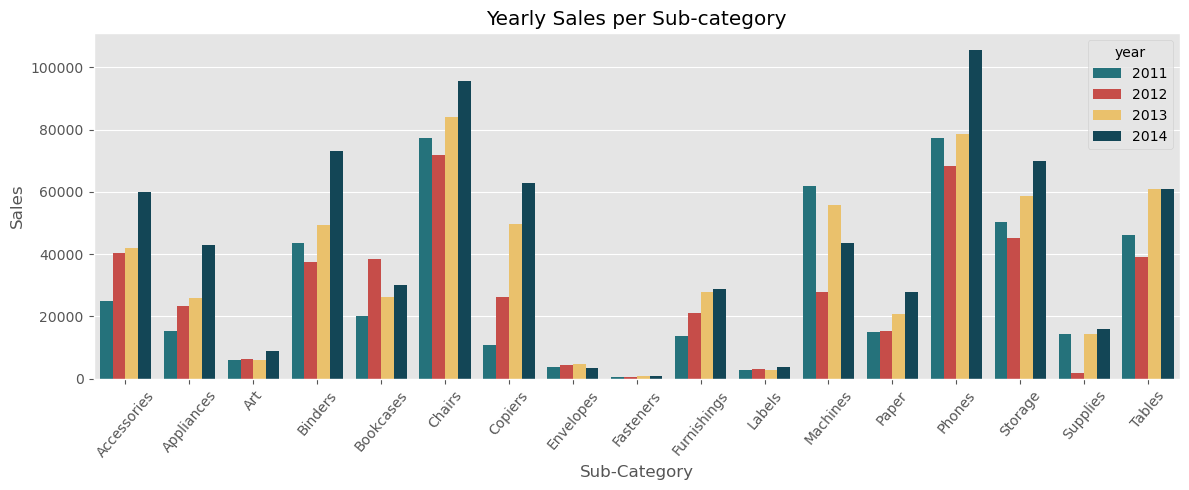

In [18]:
yearly_sales=pd.DataFrame(data.groupby(['Sub-Category','year'])['Sales'].sum()).reset_index()
yearly_sales

plt.figure(figsize=(12,5))
sns.barplot(data=yearly_sales,x='Sub-Category',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50)
plt.title('Yearly Sales per Sub-category')

plt.tight_layout()
plt.show()

In [19]:
yearly_sales['yearly_growth_rate'] = yearly_sales.groupby('Sub-Category')['Sales'].pct_change() * 100
print('Sales Annual Average Growth Rate:')
pd.DataFrame(yearly_sales.groupby('Sub-Category')['yearly_growth_rate'].mean().sort_values(ascending=False))

Sales Annual Average Growth Rate:


,yearly_growth_rate
Sub-Category,
Supplies,185.7423
Copiers,85.8547
Appliances,42.8799
Accessories,36.1576
Furnishings,29.4793
Bookcases,24.9344
Paper,24.1187
Binders,21.9130
Art,16.1833


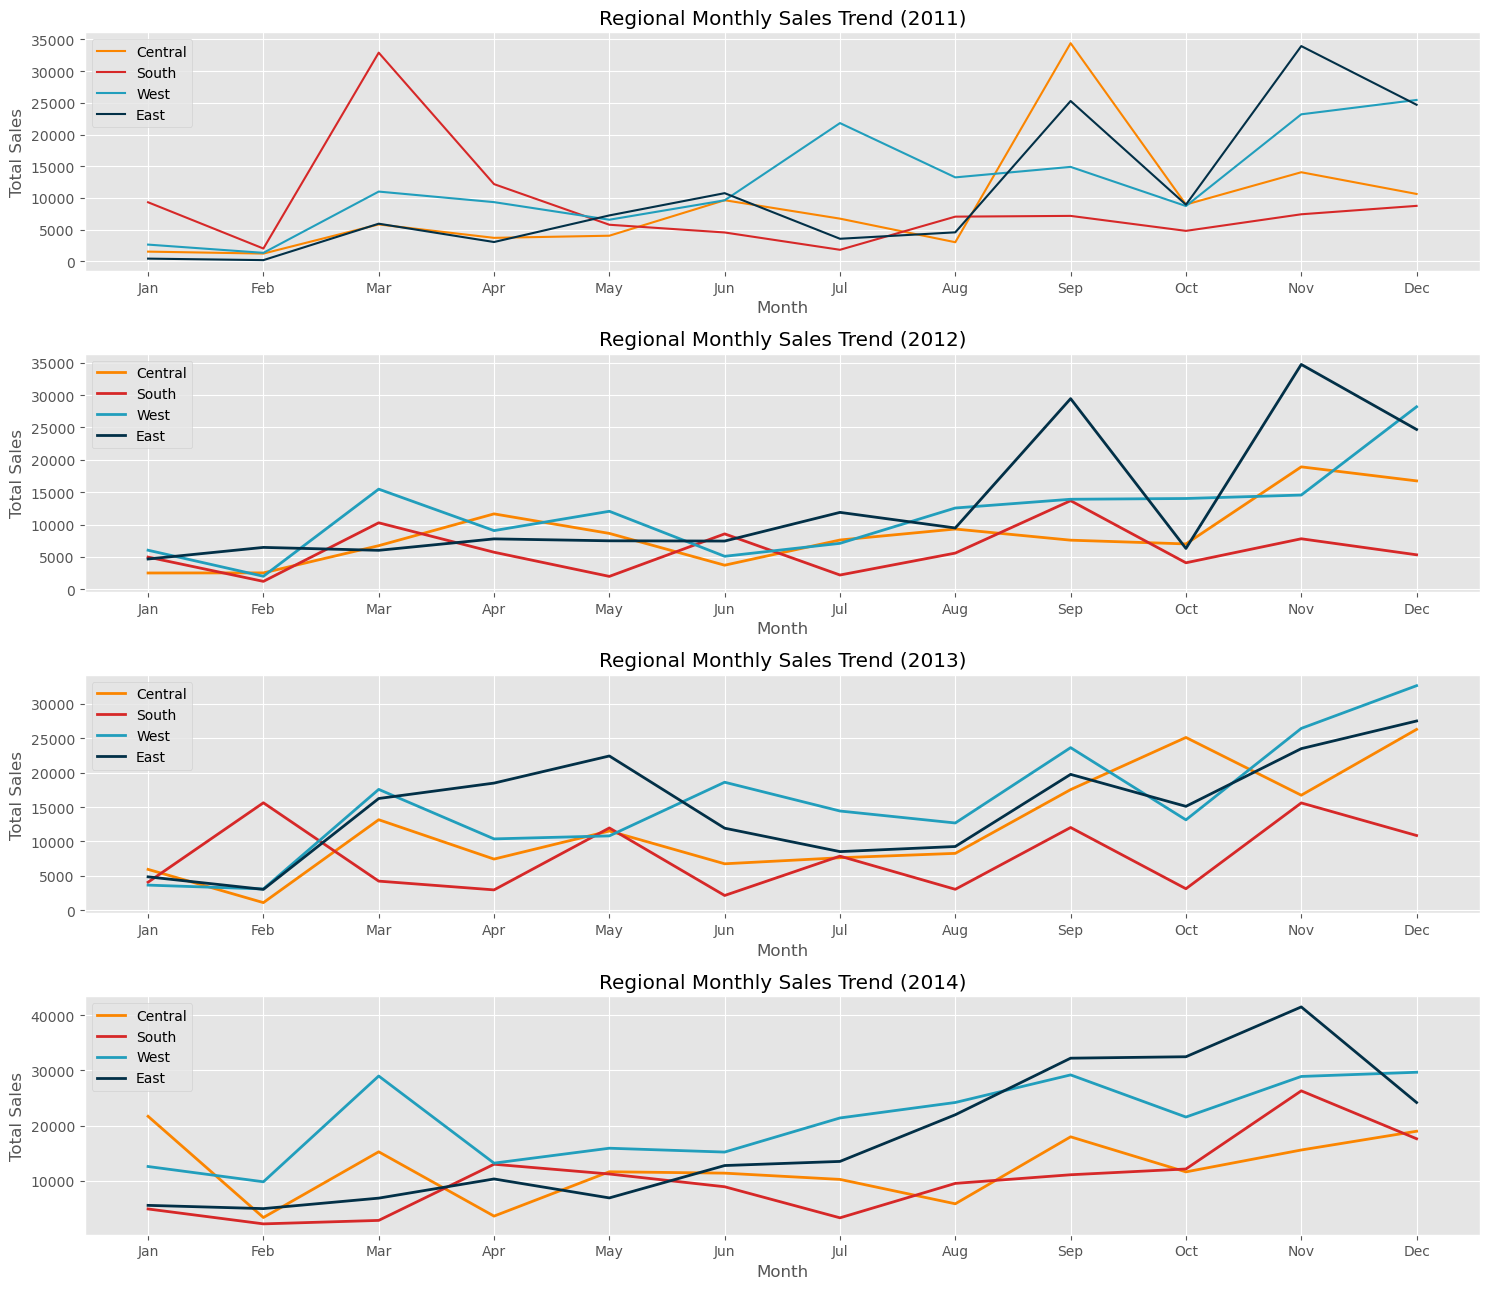

In [20]:
data11=data.query('year == 2011')
data12=data.query('year == 2012')
data13=data.query('year == 2013')
data14=data.query('year == 2014')

plt.figure(figsize=(15,13))

plt.subplot(411)
data11.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=1.5)
data11.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=1.5)
data11.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=1.5)
data11.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=1.5)

plt.title('Regional Monthly Sales Trend (2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(412)
data12.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data12.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data12.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data12.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2012)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(413)
data13.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data13.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data13.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data13.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2013)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.subplot(414)
data14.query("Region == 'Central'").groupby('month')['Sales'].sum().plot(c='#fb8500',linewidth=2)
data14.query("Region == 'South'").groupby('month')['Sales'].sum().plot(c='#d62828',linewidth=2)
data14.query("Region == 'West'").groupby('month')['Sales'].sum().plot(c='#219ebc',linewidth=2)
data14.query("Region == 'East'").groupby('month')['Sales'].sum().plot(c='#023047',linewidth=2)

plt.title('Regional Monthly Sales Trend (2014)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(['Central','South','West','East'])

plt.tight_layout()
plt.show()

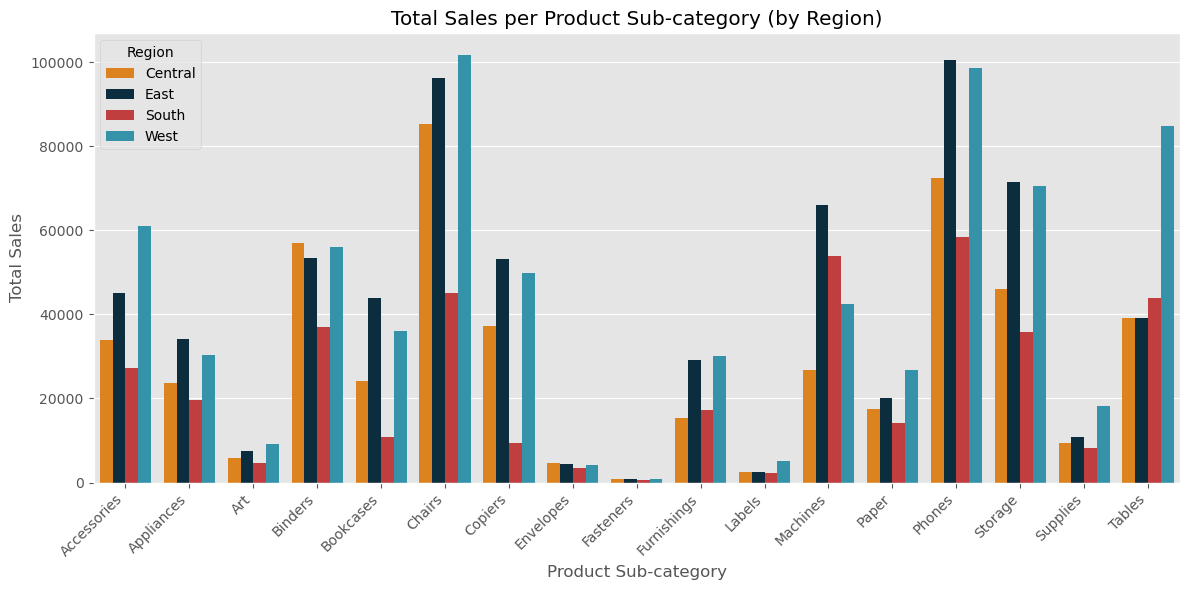

In [21]:
reg_sub=pd.DataFrame(data.groupby(['Region','Sub-Category'])['Sales'].sum()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=reg_sub, x='Sub-Category', y='Sales', hue='Region',palette=['#fb8500','#023047','#d62828','#219ebc'])
plt.xlabel('Product Sub-category')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Sub-category (by Region)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

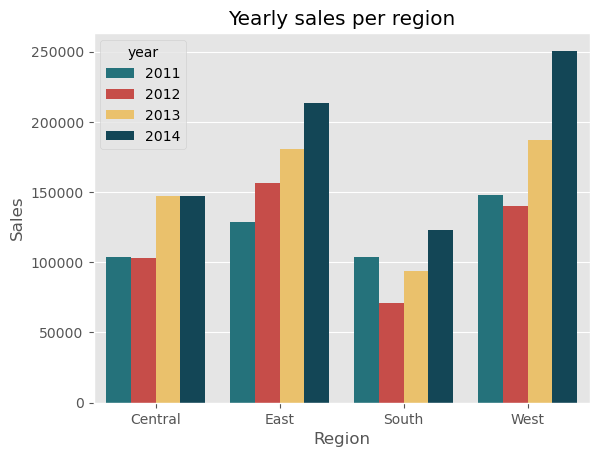

In [22]:
year_s=pd.DataFrame(data.groupby(['Region','year'])['Sales'].sum()).reset_index()
year_p=pd.DataFrame(data.groupby(['Region','year'])['(net)_profit_before_discount'].sum()).reset_index()

sns.barplot(data=year_s,x='Region',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.title('Yearly sales per region')
plt.show()

In [23]:
year_s['yearly_growth_rate']=year_s.groupby('Region')['Sales'].pct_change() * 100

print('Sales Average Annual Growth Rate (AAGR, 2011-2014) :')
pd.DataFrame(year_s.groupby('Region')['yearly_growth_rate'].mean())

Sales Average Annual Growth Rate (AAGR, 2011-2014) :


,yearly_growth_rate
Region,
Central,14.0524
East,18.3619
South,10.4230
West,20.7595


In [24]:
yearly_summary = data.groupby('year')[['Sales','net_profit']].sum()

yearly_summary['profit_margin'] = (yearly_summary['net_profit'] / yearly_summary['Sales']) * 100
yearly_summary

,Sales,net_profit,profit_margin
year,,,
2011,484247.4981,49543.9741,10.2311
2012,470532.5090,61618.6037,13.0955
2013,608473.8300,81726.9308,13.4315
2014,733947.0232,93507.5131,12.7404


In [25]:
profit_margin_df=pd.DataFrame(data.groupby(['Category','Sub-Category'])['profit_margin'].mean()).reset_index()
print("This table shows exact values on the average profit margin of each product sub-category:")
profit_margin_df

This table shows exact values on the average profit margin of each product sub-category:


,Category,Sub-Category,profit_margin
0,Furniture,Bookcases,-12.6640
1,Furniture,Chairs,4.3900
2,Furniture,Furnishings,13.7066
3,Furniture,Tables,-14.7727
4,Office Supplies,Appliances,-15.6869
5,Office Supplies,Art,25.1646
6,Office Supplies,Binders,-19.9595
7,Office Supplies,Envelopes,42.3140
8,Office Supplies,Fasteners,29.9171
9,Office Supplies,Labels,42.9663


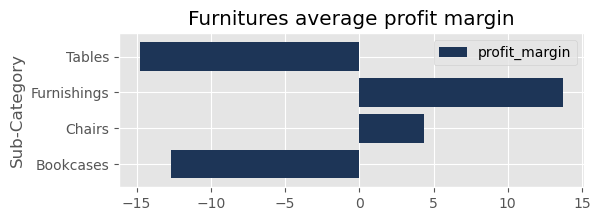

In [26]:
barr1=profit_margin_df[profit_margin_df['Category']==\
                      'Furniture'][['Sub-Category',\
                                    'profit_margin']].set_index('Sub-Category')

barr1.plot(kind='barh',\
           title='Furnitures average profit margin',\
           color='#1d3557',\
           figsize=(6,2),\
           width=.8)

plt.show()


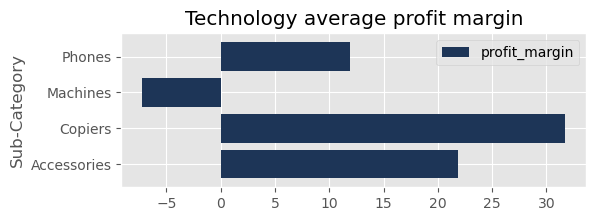

In [27]:
barr3=profit_margin_df[profit_margin_df['Category']==\
                      'Technology'][['Sub-Category',\
                                    'profit_margin']].set_index('Sub-Category')

barr3.plot(kind='barh',title='Technology average profit margin',\
           color ='#1d3557',\
           figsize=(6,2),\
           width=.8)

plt.show()

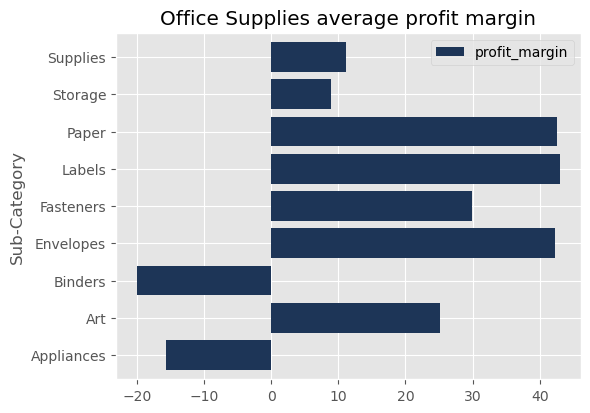

In [28]:
barr2=profit_margin_df[profit_margin_df['Category']==\
                      'Office Supplies'][['Sub-Category',\
                                    'profit_margin']].set_index('Sub-Category')

barr2.plot(kind='barh',\
           title='Office Supplies average profit margin',\
           color='#1d3557',\
           figsize=(6,4.5),\
           width=.8)

plt.show()

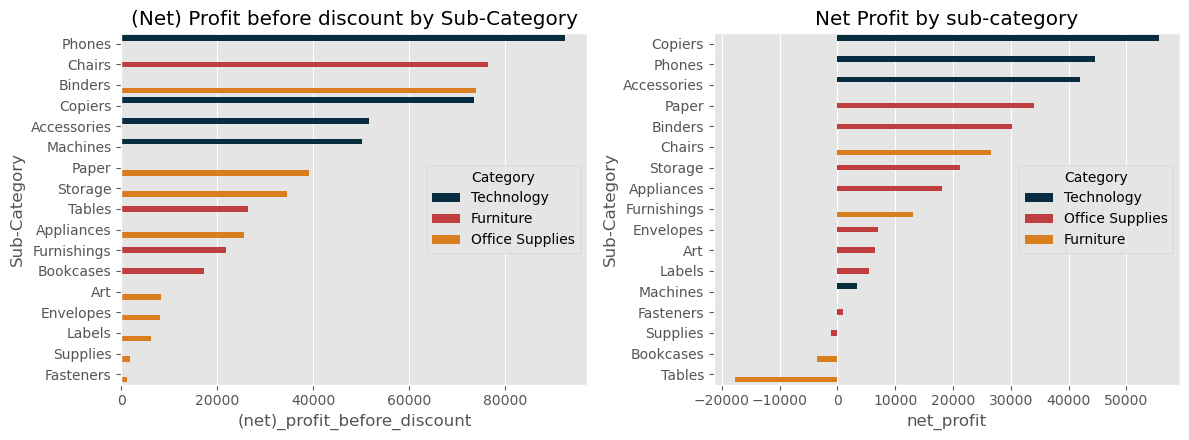

In [29]:

df_profit=pd.DataFrame(data.groupby(['Category','Sub-Category'])['(net)_profit_before_discount'].sum()).reset_index().sort_values('(net)_profit_before_discount',ascending=False)

plt.figure(figsize=(12,4.5))

plt.subplot(121)
sns.barplot(x='(net)_profit_before_discount',y='Sub-Category',data=df_profit,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('(Net) Profit before discount by Sub-Category')

plt.subplot(122)
df_profit2=pd.DataFrame(data.groupby(['Category','Sub-Category'])['net_profit'].sum()).reset_index().sort_values('net_profit',ascending=False)
sns.barplot(x='net_profit',y='Sub-Category',data=df_profit2,hue='Category',palette=['#003049','#d62828','#f77f00'])
plt.title('Net Profit by sub-category')

plt.tight_layout()
plt.show()

In [30]:
df_profit_beforeNafter=pd.merge(df_profit,df_profit2, on='Sub-Category',how='inner').drop('Category_y',axis=1)
df_profit_beforeNafter['percentage_drop']=df_profit_beforeNafter['net_profit'] / df_profit_beforeNafter['(net)_profit_before_discount'] *100 - 100
df_profit_beforeNafter=df_profit_beforeNafter.sort_values(by='percentage_drop',ascending=True)

print('This table shows how discounts applied to products during the 4-year period, affected (net) profit before discount: ')
df_profit_beforeNafter.sort_values('net_profit',ascending=False)

This table shows how discounts applied to products during the 4-year period, affected (net) profit before discount: 


,Category_x,Sub-Category,(net)_profit_before_discount,net_profit,percentage_drop
3,Technology,Copiers,73617.5553,55617.8249,-24.4503
0,Technology,Phones,92608.6698,44515.7306,-51.9314
4,Technology,Accessories,51738.6373,41936.6357,-18.9452
6,Office Supplies,Paper,39117.8365,34053.5693,-12.9462
2,Office Supplies,Binders,73966.8426,30221.7633,-59.1415
1,Furniture,Chairs,76404.9664,26590.1663,-65.1984
7,Office Supplies,Storage,34476.7960,21278.8264,-38.2807
9,Office Supplies,Appliances,25628.3051,18138.0054,-29.2267
10,Furniture,Furnishings,21768.0964,13059.1436,-40.0079
13,Office Supplies,Envelopes,8138.1671,6964.1767,-14.4257


Shown is a visual comparison of annual net profit of each product sub-category before applying order discounts:


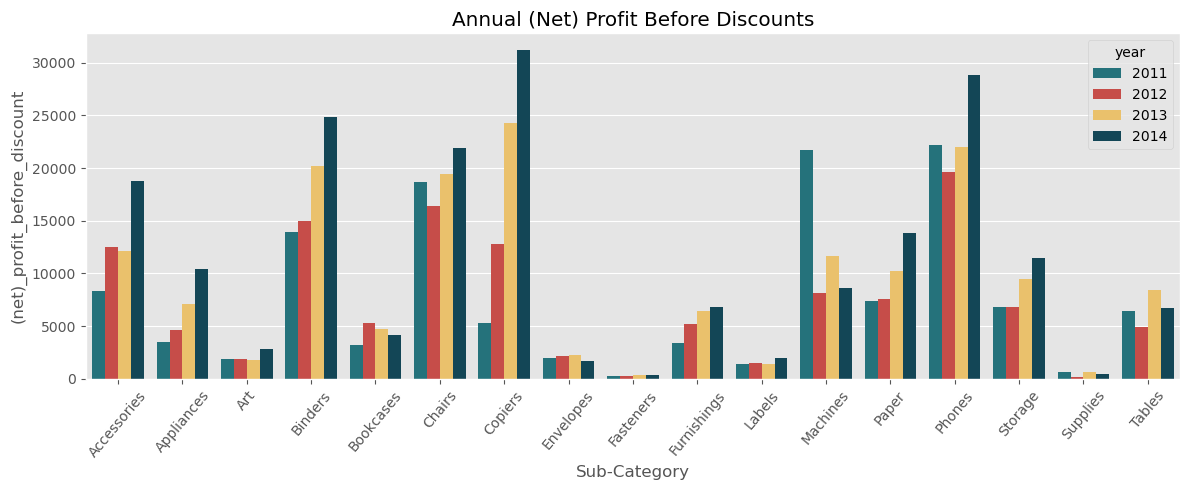

In [31]:

total_1=pd.DataFrame(data.groupby(['Sub-Category','year'])[['(net)_profit_before_discount']].sum().reset_index())

print('Shown is a visual comparison of annual net profit of each product sub-category before applying order discounts:')

plt.figure(figsize=(12,5))

sns.barplot(data=total_1,x='Sub-Category',y='(net)_profit_before_discount',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50,ha='center')
plt.title('Annual (Net) Profit Before Discounts')

plt.tight_layout()
plt.show()

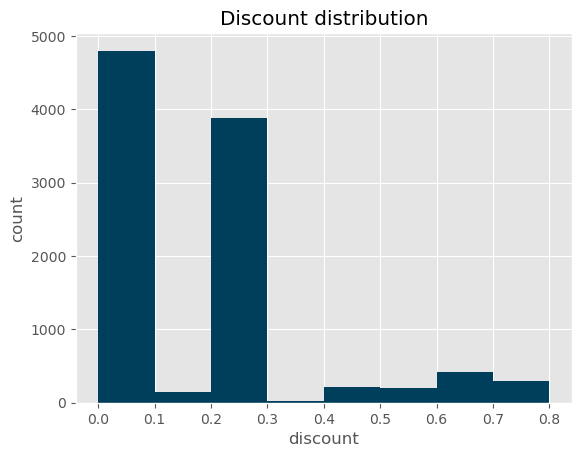

In [32]:
plt.hist(data=data,x='Discount',bins=8,color='#003f5c') # distribution of discount
plt.title('Discount distribution')
plt.xlabel('discount')
plt.ylabel('count')
plt.show()

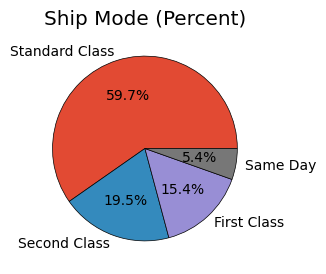

In [33]:
i3=data['Ship Mode'].value_counts()/len(data)*100
i3

plt.figure(figsize=(5,3))
plt.pie(i3,labels=i3.index,autopct='%.1f%%',textprops={'fontsize':10},wedgeprops={'edgecolor': 'black'})
plt.title('Ship Mode (Percent)')

plt.show()

In [34]:
print('Following are the average order fulfillment time for corresponding ship modes:')

print("Standard Class:",data[data['Ship Mode'] == 'Standard Class']['order_fulfillment_time'].mean())
print("Second Class:",data[data['Ship Mode'] == 'Second Class']['order_fulfillment_time'].mean())
print("First Class:",data[data['Ship Mode'] == 'First Class']['order_fulfillment_time'].mean())

Following are the average order fulfillment time for corresponding ship modes:
Standard Class: 5 days 00:10:22.520107238
Second Class: 3 days 05:45:44.884318766
First Class: 2 days 04:22:09.518855656


In [35]:
print('Annual Average Transaction Value (nominal):')

av_tv=pd.DataFrame(data.groupby('year')['Sales'].sum() / data['Order ID'].nunique())
av_tv['change'] = av_tv['Sales'].pct_change() * 100
av_tv

Annual Average Transaction Value (nominal):


,Sales,change
year,,
2011,96.6755,NaN
2012,93.9374,-2.8322
2013,121.4761,29.3160
2014,146.5257,20.6210


In [36]:
print('Annual Discounted Sales')
pd.DataFrame(data.groupby('year')['discounted_sales'].sum())

Annual Discounted Sales


,discounted_sales
year,
2011,406690.7027
2012,407671.3237
2013,527707.8887
2014,632548.8109


In [37]:
profit_met=pd.DataFrame(data.groupby('year')[['net_profit','Sales']].sum())
profit_met['net_profit_margin'] = (profit_met['net_profit'] / profit_met['Sales']) * 100
profit_met

,net_profit,Sales,net_profit_margin
year,,,
2011,49543.9741,484247.4981,10.2311
2012,61618.6037,470532.5090,13.0955
2013,81726.9308,608473.8300,13.4315
2014,93507.5131,733947.0232,12.7404
